In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Imports

# import the needed libs

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import re
from sklearn import metrics
import pandas as pd

plt.ion()   # interactive mode

In [ ]:
def AnalysisMetrics(classe_teste, PrevisoesProb):

  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False) 

  # Calculo da AUC
  auc = round(metrics.roc_auc_score(classe_teste, PrevisoesProb), 3) 

  # Dataframe com indice de Youden:
  DataFrameYouden = pd.DataFrame(data={'Threshold':thresholds,'Youden':TPR - FPR, 'TPR':TPR,'FPR':FPR})

  # Dataframe com indice maximo de Youden:
  DataFrameYoudenMax = DataFrameYouden.sort_values(by='Youden', ascending = False) # Ordenando em ordem crescente

  # Print do valor de threshold que maximiza o índice de Youden:
  # print('\n Melhor Decision Threshold: ', DataFrameYoudenMax.Threshold.values[0]) # printando valor de threshold que maximiza o Youden
  # print('\n Melhor Índice de Youden: ', DataFrameYoudenMax.Youden.values[0]) # printando valor maximo do Youden
  # print('\n Melhor TPR: ', DataFrameYoudenMax.TPR.values[0]) # printando valor maximo do Youden
  # print('\n Melhor FPR: ', DataFrameYoudenMax.FPR.values[0]) # printando valor maximo do Youden

  tpr = round(DataFrameYoudenMax.TPR.values[0], 2)
  fpr = round(DataFrameYoudenMax.FPR.values[0], 2)
  BestThreshold = round(DataFrameYoudenMax.Threshold.values[0], 2)

  predictions = (PrevisoesProb >= BestThreshold).astype(int)
  accuracy = round(np.mean(predictions == classe_teste), 2)
  precision = round(tpr / (tpr + fpr),2)

  return auc, tpr, fpr, precision, accuracy, BestThreshold 


In [ ]:
PATH = '/content/gdrive/Shareddrives/IA901 - Projeto Final/Notebooks/FinalResults/'

# Criando pasta para salvar resultados finais
if not os.path.exists(PATH+'FinalComparison/'):
  os.mkdir(PATH+'FinalComparison/')

In [ ]:

Results_Address = os.listdir(PATH)
Results_Address.remove('FinalComparison') # removendo pasta dos resultados finais

for i in Results_Address:
  print(i)
  globals()['Result'+str(i)] = pd.read_csv(PATH+"{}/".format(str(i))+"DL_Prediction.csv")
  globals()['Class'+str(i)] = globals()['Result'+str(i)]['Class'].values 
  globals()['Pred'+str(i)] = globals()['Result'+str(i)]['Pred'].values
  globals()['Types'+str(i)] = globals()['Result'+str(i)]['Types'].values

Legendas = ['Deep L. (Baseline)', 'Deep L. (excluding Breast)']

DL_Baseline
Experiment_I


# Comparações entre estudos e experimentos

DL_Baseline
Best Metrics! 

AUC: 0.97, TPR: 0.92, FPR: 0.05, Precision: 0.95, Accuracy: 0.94, Best Threshold: 0.43
Experiment_I
Best Metrics! 

AUC: 0.917, TPR: 0.84, FPR: 0.09, Precision: 0.9, Accuracy: 0.87, Best Threshold: 0.01


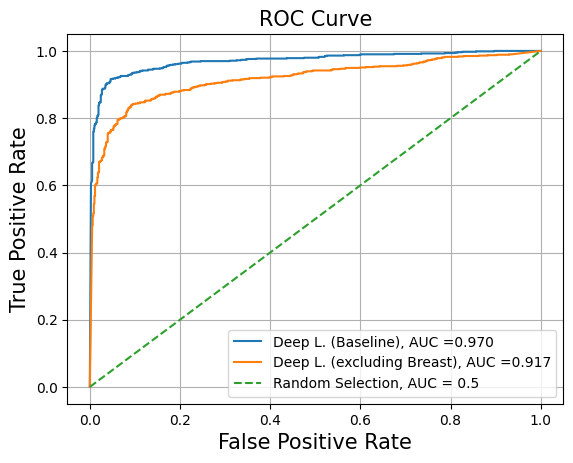

In [ ]:
# ROC Curve:

# Plotando ROC Curve com matplotlib:
fig = plt.figure()
ax = fig.add_subplot(111)

MetricsList = []
cont = 0
for i in Results_Address:

  print(i)
  classe_teste = globals()['Class'+str(i)]
  PrevisoesProb = globals()['Pred'+str(i)]

  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False) 
  # Calculo da AUC
  auc = metrics.roc_auc_score(classe_teste, PrevisoesProb) 
  ax.plot(FPR, TPR, label="{}".format(Legendas[cont])+", AUC ="+np.format_float_positional(auc, precision=3))

  # Best Metrics!
  print('Best Metrics! \n')
  auc, tpr, fpr, precision, accuracy, BestThreshold  = AnalysisMetrics(classe_teste, PrevisoesProb)
  print('AUC: {}, TPR: {}, FPR: {}, Precision: {}, Accuracy: {}, Best Threshold: {}'.format(auc, tpr, fpr, precision, accuracy, BestThreshold))
  MetricsList.append({'Estudo':i, 'AUC':auc, 'TPR':tpr,'FPR':fpr,'Precision':precision,'Accuracy':accuracy,'BestThreshold':BestThreshold})

  cont = cont + 1

ax.plot([0,1], [0,1], linestyle='--', label='Random Selection, AUC = 0.5')
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_title('ROC Curve', fontsize=15)
ax.grid()
ax.legend(loc='lower right')
plt.savefig(PATH+'FinalComparison/ROC_GeneralAnalysis.png')
plt.show()

# Metrics

MetricsList = pd.DataFrame(MetricsList)
MetricsList.to_csv(PATH+'FinalComparison/Metrics_GeneralAnalysis.csv', index=False, encoding='utf-8')

In [ ]:
MetricsList

,Estudo,AUC,TPR,FPR,Precision,Accuracy,BestThreshold
0,DL_Baseline,0.970,0.92,0.05,0.95,0.94,0.43
1,Experiment_I,0.917,0.84,0.09,0.90,0.87,0.01


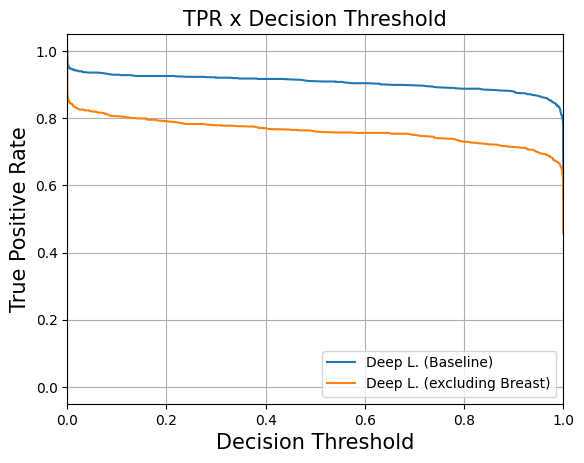

In [ ]:
# Gráficos de D. Threshold:

fig = plt.figure()
ax = fig.add_subplot(111)

cont = 0
for i in Results_Address:

  classe_teste = globals()['Class'+str(i)]
  PrevisoesProb = globals()['Pred'+str(i)]
  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False) 
  ax.plot(thresholds, TPR, label="{}".format(Legendas[cont]))
  cont = cont + 1


ax.set_xlabel('Decision Threshold', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_title('TPR x Decision Threshold', fontsize=15)
ax.grid()
ax.set_xlim((0,1.0))
ax.legend(loc='lower right')
plt.savefig(PATH+'FinalComparison/TPR_GeneralAnalysis.png')
plt.show()

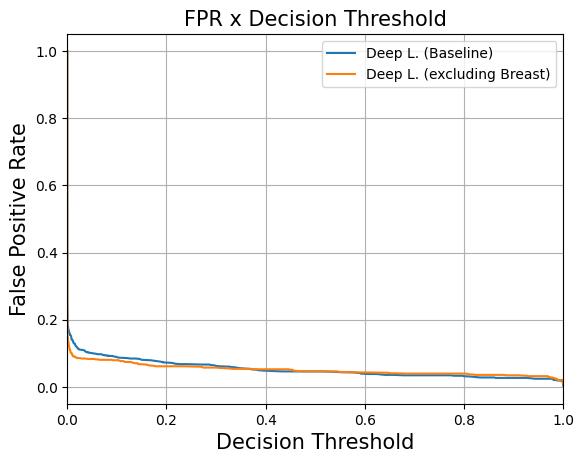

In [ ]:
# Gráficos de D. Threshold:

fig = plt.figure()
ax = fig.add_subplot(111)

cont = 0
for i in Results_Address:

  classe_teste = globals()['Class'+str(i)]
  PrevisoesProb = globals()['Pred'+str(i)]
  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False) 
  ax.plot(thresholds, FPR, label="{}".format(Legendas[cont]))
  cont = cont + 1


ax.set_xlabel('Decision Threshold', fontsize=15)
ax.set_ylabel('False Positive Rate', fontsize=15)
ax.set_title('FPR x Decision Threshold', fontsize=15)
ax.grid()
ax.legend(loc='upper right')
ax.set_xlim((0,1.0))
plt.savefig(PATH+'FinalComparison/FPR_GeneralAnalysis.png')
plt.show()

# Comparação de performance entre diferentes tecidos

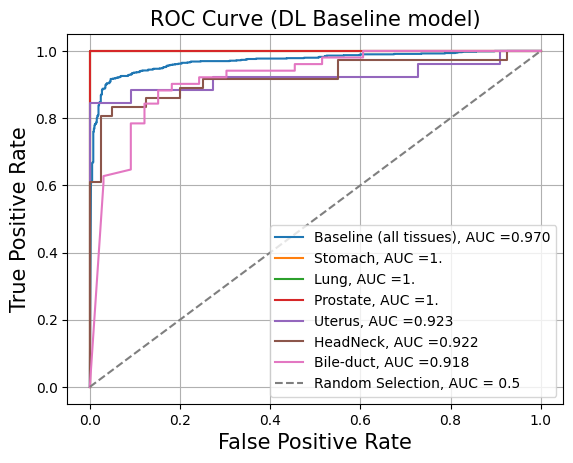

In [ ]:
# ROC Curves para cada tecido:
TissueTypes = np.unique(TypesDL_Baseline)

cont = 0
AUCList = []
for i in TissueTypes:

  classe_teste = ResultDL_Baseline[ResultDL_Baseline.Types==i]['Class'].values 
  PrevisoesProb = ResultDL_Baseline[ResultDL_Baseline.Types==i]['Pred'].values 
  auc = metrics.roc_auc_score(classe_teste, PrevisoesProb) 
  auc, tpr, fpr, precision, accuracy, BestThreshold  = AnalysisMetrics(classe_teste, PrevisoesProb)

  AUCList.append({'N. amostras':len(classe_teste), 'Types':i, 'AUC':auc, 'TPR':tpr,'FPR':fpr,'Precision':precision,'Accuracy':accuracy,'BestThreshold':BestThreshold})
  #FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False) 
  # Calculo da AUC
  
  #ax.plot(FPR, TPR, label="{}".format(i)+", AUC ="+np.format_float_positional(auc, precision=3))
  cont = cont + 1

DataFrameAUCList = pd.DataFrame(AUCList)
DataFrameAUCList = DataFrameAUCList.sort_values(by='AUC', ascending = False) # Ordenando em ordem crescente
SelectedTissues = np.concatenate((DataFrameAUCList['Types'].head(3).values, DataFrameAUCList['Types'].tail(3).values), axis=0)

# Plotando ROC Curve com matplotlib:
fig = plt.figure()
ax = fig.add_subplot(111)

cont = 0
for i in SelectedTissues:

  # Plot do Baseline
  if cont==0:
    FPR, TPR, thresholds = metrics.roc_curve(ResultDL_Baseline['Class'].values, ResultDL_Baseline['Pred'].values, drop_intermediate=False) 
    auc = metrics.roc_auc_score(ResultDL_Baseline['Class'].values, ResultDL_Baseline['Pred'].values) 
    # Calculo da AUC
    ax.plot(FPR, TPR, label="Baseline (all tissues)"+", AUC ="+np.format_float_positional(auc, precision=3))

  classe_teste = ResultDL_Baseline[ResultDL_Baseline.Types==i]['Class'].values 
  PrevisoesProb = ResultDL_Baseline[ResultDL_Baseline.Types==i]['Pred'].values 
  FPR, TPR, thresholds = metrics.roc_curve(classe_teste, PrevisoesProb, drop_intermediate=False) 
  # Calculo da AUC
  auc = metrics.roc_auc_score(classe_teste, PrevisoesProb) 

  # Plot
  ax.plot(FPR, TPR, label="{}".format(i)+", AUC ="+np.format_float_positional(auc, precision=3))

  cont = cont + 1

ax.plot([0,1], [0,1], linestyle='--', label='Random Selection, AUC = 0.5')
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_title('ROC Curve (DL Baseline model)', fontsize=15)
ax.grid()
ax.legend(loc='lower right')
plt.savefig(PATH+'FinalComparison/ROC_TissueAnalysis.png')
plt.show()


In [ ]:
# Lista completa de Tecidos e respectivas AUCs:
DataFrameAUCList.to_csv(PATH+'FinalComparison/Metrics_TissueAnalysis.csv', index=False, encoding='utf-8')
DataFrameAUCList

,N. amostras,Types,AUC,TPR,FPR,Precision,Accuracy,BestThreshold
15,29,Stomach,1.000,1.00,0.00,1.00,0.97,0.74
10,36,Lung,1.000,1.00,0.00,1.00,0.97,0.22
13,35,Prostate,1.000,1.00,0.00,1.00,0.83,1.00
4,58,Cervix,0.997,0.95,0.00,1.00,0.95,0.95
0,87,Adrenal_gland,0.988,0.98,0.00,1.00,0.98,0.08
6,84,Esophagus,0.984,0.94,0.06,0.94,0.93,0.56
8,26,Kidney,0.981,0.88,0.00,1.00,0.92,0.98
2,29,Bladder,0.980,1.00,0.12,0.89,0.90,0.33
16,39,Testis,0.976,0.95,0.00,1.00,0.95,0.99
3,470,Breast,0.974,0.91,0.04,0.96,0.93,0.63
